In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [17]:
img1 = cv2.imread('images/rafa1.png',0)          # queryImage
img2 = cv2.imread('images/rafa2.png',0) # trainImage
img3 = cv2.imread('images/rafa3.jpg',0) # trainImage

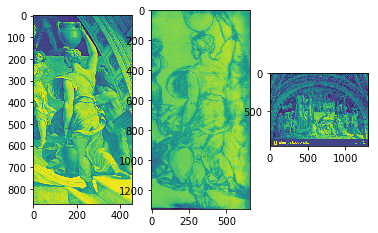

In [14]:
plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(1,3,2)
plt.imshow(img2)
plt.subplot(1,3,3)
plt.imshow(img3)

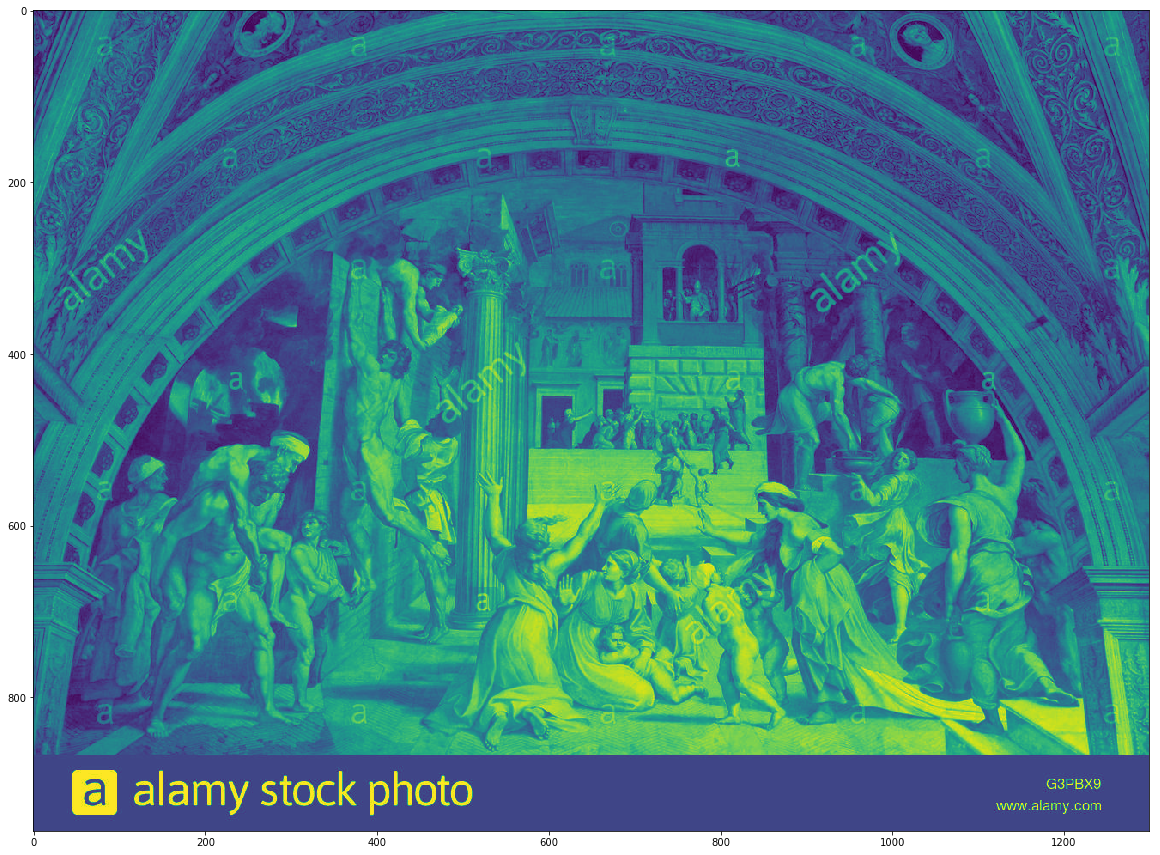

In [15]:
plt.figure(figsize=(20,20))
plt.imshow(img3)

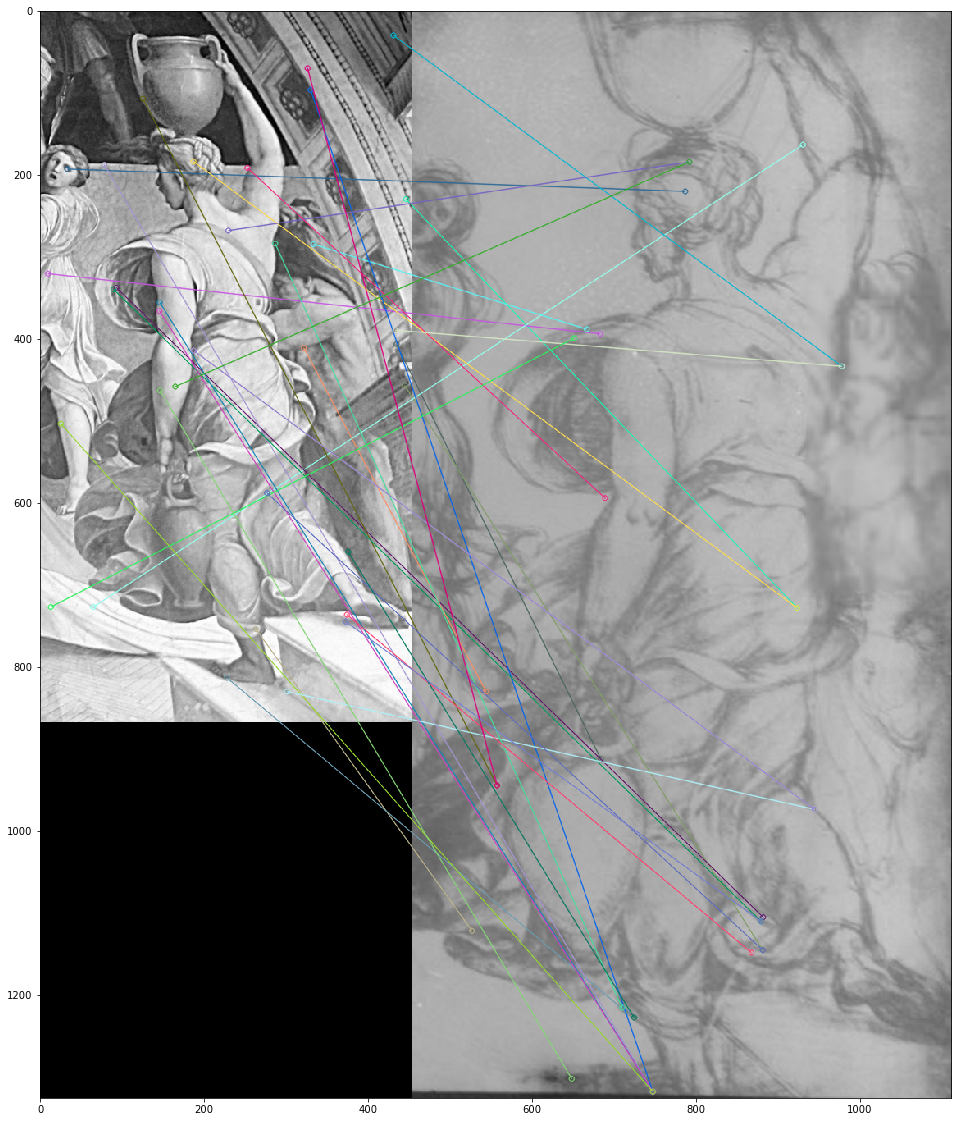

In [19]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
# img3 =img1.copy()
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2,outImg=img3)

plt.figure( figsize=(20, 20))
plt.imshow(img3)